# To run the ABRam-BG model
Notebook author: Aida Sarai Figueroa-Alvarez  
Researcher in Mathematics for sustainability transitions  
Department of Mathematics and Computer Sciences  
Freie Universitaet Berlin  
September 2025

### Information about the *run_the_model_notebook*
In this notebook we give an example of how to run simulations using the ABRam-BG Model.

To explore the implementation details of the ABRam-BG Model, take a look at the *ABRam-BG-Model notebook*

In [1]:
#Import necessary packages for plot figures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Note:** For running the model you need the Agentpy package. If you don't have it go to `src/ABRam-BG-model-v1.py`  and uncomment the line where you can install the package.

In [2]:
# We call the model
#import functions from src file
import os
import sys

# Get the absolute path of the parent directory (project root)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to the Python path
if project_root not in sys.path:
    sys.path.append(project_root)

# Now import ABM
from src import ABRam_BG_model_v1 as ABM

In [3]:
#We set the parameter values for the agents
delta = 0.05
alpha = 0.33
rho = 0.99

#Set the value for the initial technical progress
gamma0 = 1.54
beta0 = 8.00

#Set general paramaters for the simulation
periods = 120

To create the lists for the agents' initial capital we set the initial number of green and brown farms in the economy, as well the total initial value for the capitals in the system.

In [4]:
#Number of farms in the systems
brown_farms = 80
green_farms = 20
Farms = brown_farms + green_farms

# Total Initial capital in the system
Tot_B0 = 8
Tot_G0 = 2

#Farms initial capital 
#(For this example farms just own one type of capital, since we embbed the farms' opinions
# accordingly to their capital holdings).
B0 = [Tot_B0/brown_farms for x in range(brown_farms)] +[0.0]*green_farms
G0 = [0.0]*brown_farms+[Tot_G0/green_farms for x in range(green_farms)]

## Running a simulation

As example we run a simulation where agents interact via de the **voters dynamics** and are embedded in a small-world network. 


**Note:** If you want to run a simulation where agents **don't** interact, modify `` interaction `` parameter to ``False ``. 

If you want to change the interaction type among agents, modify  `` interacation_type`` parameter to `` MajorityRule ``

In [5]:
#We declare the dictionary of parameters for the simulation 

parameters = {
    'agents':Farms,
    'steps': periods,
    'delta': delta,
    'alpha': alpha,
    'rho': rho,
    'beta0': beta0,
    'gamma0': gamma0 ,
    'Tot_B0': Tot_B0, 
    'Tot_G0': Tot_G0,
    'B0' : tuple(B0),
    'G0': tuple(G0),
    'interaction': True, #False
    'interaction_type': 'Voter', #MajorityRule
    'interacting_farms': 4,
    'network_topology': 'SW',
    'number_of_friends': 5,
    'network_randomness': 0.5,
    'time_steps_in_1_year':4,
    'seed':42,
    'draw_network':False #For visualization draw initial and final network
}

#We run the model 
model = ABM.Economy(parameters)
results = model.run()

Completed: 120 steps
Run time: 0:00:00.314496
Simulation finished


# Simulation output
The output from the simulation run defined above looks as follows:

1. The simulation returns a `Data Dict` (for more information about running a simulation using Agentpy see: [https://agentpy.readthedocs.io/en/latest/overview.html#running-a-simulation](https://agentpy.readthedocs.io/en/latest/overview.html#running-a-simulation)) 

In [6]:
results

DataDict {
'info': Dictionary with 9 keys
'parameters': 
    'constants': Dictionary with 20 keys
'variables': 
    'Farm': DataFrame with 16 variables and 12100 rows
    'Statistician': DataFrame with 16 variables and 121 rows
'reporters': DataFrame with 3 variables and 1 row
}

In [7]:
results.info

{'model_type': 'Economy',
 'time_stamp': '2025-09-15 12:03:49',
 'agentpy_version': '0.1.5',
 'python_version': '3.8.8',
 'experiment': False,
 'completed': True,
 'created_objects': 102,
 'completed_steps': 120,
 'run_time': '0:00:00.314496'}

In [8]:
# To have a quick look on the output data frame for the farms
results.variables.Farm.head()

G          B          K    b    g    L  P_G          P_B  \
obj_id t                                                               
1      0  0.0   0.100000   0.100000  1.0  0.0  1.0  0.0     1.883954   
       1  0.0   0.487318   0.487318  1.0  0.0  1.0  0.0     9.180839   
       2  0.0   2.374784   2.374784  1.0  0.0  1.0  0.0    44.739847   
       3  0.0  11.572743  11.572743  1.0  0.0  1.0  0.0   218.025151   
       4  0.0  56.396014  56.396014  1.0  0.0  1.0  0.0  1048.099807   

                    P  I_G         I_B           I           C          U  \
obj_id t                                                                    
1      0     1.883954  0.0    0.392318    0.392318    1.491636   0.399874   
       1     9.180839  0.0    1.911833    1.911833    7.269007   2.383493   
       2    44.739847  0.0    9.316698    9.316698   35.423149   5.950859   
       3   218.025151  0.0   45.401908   45.401908  172.623243  11.101970   
       4  1048.099807  0.0  217.711611  217.711611  830.388196  17.823864   

                 u  new_O  
obj_id t                   
1      0  0.399874      0  
       1  1.983620      0  
       2  3.567366      0  
       3  5.151111      0  
       4  6.721893      0

In [9]:
# To have a quick look on the data frame for the statistician 
results.variables.Statistician.head()

Total_G      Total_B      Total_K    real_beta  real_gamma  \
obj_id t                                                                  
101    0    2.000000     8.000000    10.000000     8.000000    1.540000   
       1    3.544293    38.985408    42.529701    38.985408    2.729105   
       2    6.281006   189.982759   196.263764   189.982759    4.836374   
       3   11.130861   925.819431   936.950293   925.819431    8.570763   
       4  110.529331  4420.877269  4531.406600  4420.877269   85.107585   

                   GDP   Total_P_G     Total_P_B    g_rate   Total_I_G  \
obj_id t                                                                 
101    0    163.209380   12.493062    150.716319  0.000000    1.644293   
       1    756.606690   22.139534    734.467156  3.635804    2.913927   
       2   3618.422253   39.234494   3579.187759  3.782435    5.163906   
       3  17511.541349   69.529267  17442.012081  3.839552   99.955013   
       4  83365.379286  392.614174  82972.765113  3.760596  302.456922   

             Total_I_B       Total_I       Total_C  K_output_rate  B_farms  \
obj_id t                                                                     
101    0     31.385408     33.029701    130.179679       0.061271       80   
       1    152.946621    155.860548    600.746142       0.056211       80   
       2    745.335811    750.499716   2867.922537       0.054240       80   
       3   3541.348809   3641.303822  13870.237527       0.053505       78   
       4  16981.505649  17283.962571  66081.416715       0.054356       78   

             C_CO2  
obj_id t            
101    0  0.000291  
       1  0.001471  
       2  0.007433  
       3  0.037570  
       4  0.185358

# Analyis of the simulation output
Note that the following analysis is tailored to the simulation run above. When making changes (e.g. Farms with different initial capital stocks), it should be adapted.

## Macro data 

We plot a figure with the simulation's macroeconomic data gathered by the statistician

In [10]:
#We select the statistician data frame & obj_id
STATS = results.variables.Statistician.loc[Farms+1]

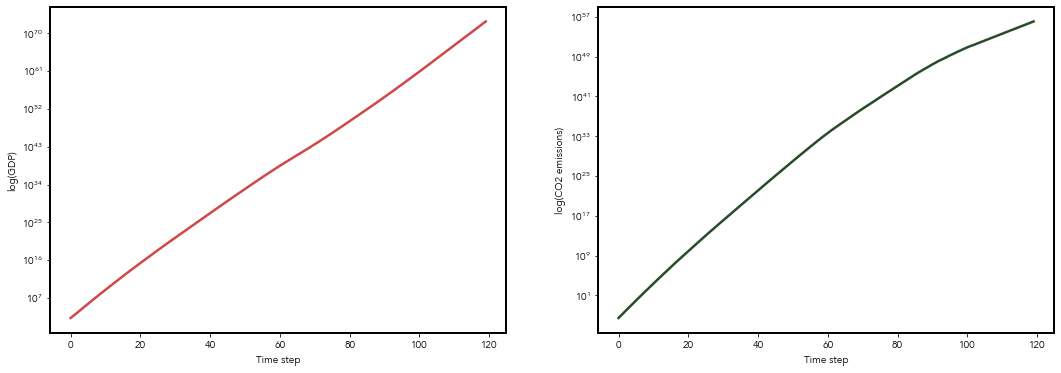

In [11]:
# we set in a list the variables we want to plot
eco_var = ['GDP', 'C_CO2']
# we set a list with the names of the variables for the ylabel
ylabel = ['GDP', 'CO2 emissions']

#We decide the lenght of the simulation we want to plot
init, fin = 0, periods

#--   We define the figure settings

# we select the colors of the plots, font, font size and linewidth
color = ['#D04848', '#294B29', '#FE7A36', '#6895D2']
plt.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

#-- We initialize the figure
fig = plt.figure(figsize = (18,6))
plt.subplots_adjust(hspace= 0.3)

# Categorical Data
a = 1  # number of rows
b = 2  # number of columns

# With this for-loop we actually plot the Macro variables
for i, var in enumerate(eco_var):
    plt.subplot(a, b, i+1)
    
    STATS[var][init:fin].plot(c=color[i], lw = 2.5)
    plt.ylabel(f'log({ylabel[i]})')
    plt.xlabel('Time step')
    
    plt.yscale('log')    
plt.show()

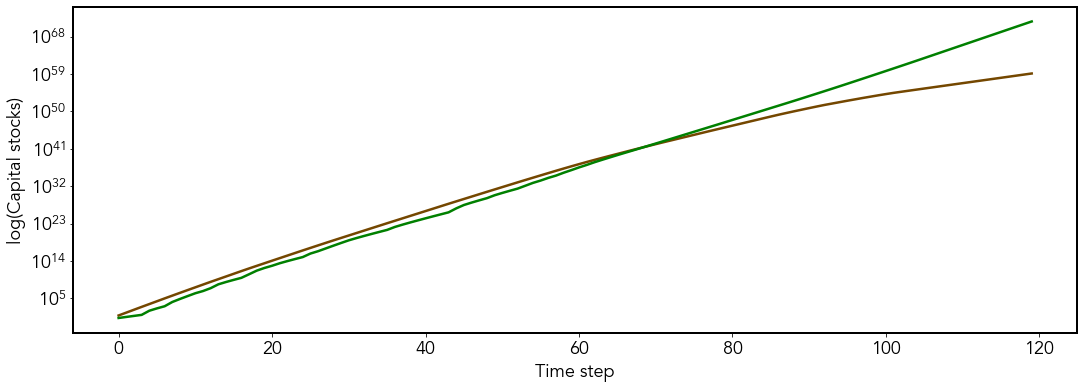

In [12]:
# we set in a list the variables we want to plot
eco_var = ['Total_B', 'Total_G']

#We decide the lenght of the simulation we want to plot
init, fin = 0, periods

#--   We define the figure settings

# we select the colors of the plots, font, font size and linewidth
color = ['#744700', 'green']
plt.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

#-- We initialize the figure
fig = plt.figure(figsize = (18,12/2))
# With this for-loop we actually plot the Macro variables
for i, var in enumerate(eco_var):    
    STATS[var][init:fin].plot(c=color[i], lw = 2.5)
    plt.xlabel('Time step')
    plt.yscale('log') 
    
plt.ylabel('log(Capital stocks)') 
plt.show()

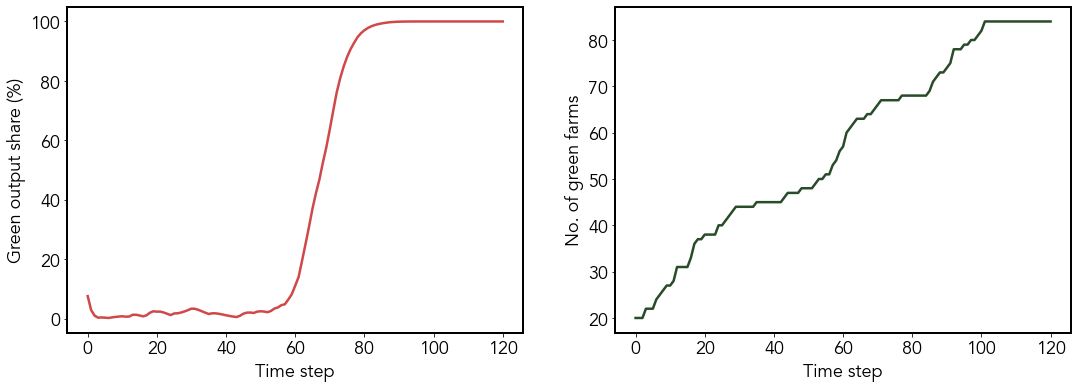

In [13]:
#Plot of the evolution of number of green farms and green output share
labels = ['Green output share (%)', 'No. of green farms']

#We decide the lenght of the simulation we want to plot
init, fin = 0, periods

#--   We define the figure settings

# we select the colors of the plots, font, font size and linewidth
color = ['#D04848', '#294B29', '#FE7A36', '#6895D2']
plt.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

#Set the variables we want to plot
green_share_output = STATS['Total_P_G']/STATS['GDP']
green_farms = green_farms = Farms - STATS['B_farms']

#We initialize the figure
# Categorical Data
a = 1  # number of rows
b = 2  # number of columns
           
fig = plt.figure(figsize = (18,6))
plt.subplots_adjust(hspace= 0.3)

# With this for-loop we actually plot the Macro variables
for i, var in enumerate(labels):
    plt.subplot(a, b, i+1)
    
    if i == 0: #Plot green share output
        green_share_output = STATS['Total_P_G']/STATS['GDP']
        (green_share_output*100).plot(c=color[i], lw = 2.5)
        plt.ylabel(f'{labels[i]}')
    else: #Plot no. of green farms
        green_farms = Farms - STATS['B_farms']
        green_farms.plot(c=color[i], lw = 2.5)
        plt.ylabel(f'{labels[i]}')
  
    plt.xlabel('Time step')

plt.show()

## Micro data

We compare the microeconomic performance of each type of farm

In [14]:
#We select the farms data frame
FARMS = results.variables.Farm

In [15]:
#We compare four farms, stubborn green & brown and early & late adopter

#We look for the early and late adopter of the simulation, i.e. brown farms that change beliefs 

#We obtain the id of the farms that have a green belief at time step 110
greenfarms_id = list(FARMS.query('t==110 and new_O==1').index.get_level_values(0))
#As well for the brown farms at time step 110
brownfarms_id = list(FARMS.query('t==110 and new_O==0').index.get_level_values(0))

#We iterate over the green farms to obtain the earlier and later adopter, and the time they change of opinion
t_earlyAdopter, id_earlyAdopter = periods, 0
t_lateAdopter, id_lateAdopter = 0, 0
for i, farm_id in enumerate(greenfarms_id):
    t = FARMS.query(f'obj_id == {farm_id} and new_O==1').index.get_level_values(1)[0]
    #Check if farm is early adopter
    if t>0 and t<t_earlyAdopter:
        t_earlyAdopter = t
        id_earlyAdopter = farm_id
    elif t > 0 and t>t_lateAdopter:
        t_lateAdopter = t
        id_lateAdopter = farm_id
    else:
        pass
    
print(f'early adopter: t={t_earlyAdopter}, id={id_earlyAdopter}')
print(f' late adopter: t={t_lateAdopter}, id={id_lateAdopter}')

early adopter: t=2, id=9
 late adopter: t=100, id=45


In [16]:
#Select stubborn brown and green farms by their id

#For the stubborn brown farm id, we select the first element of the brownfarms_id list
i=0
while i not in brownfarms_id: 
    i= i +1
    id_brown = i

#For the stubborn green id, we select the last element of the greenfarms_id list
id_green = greenfarms_id[-1]

#Now we have the farms we are going to compare
earlyAdopter = FARMS.loc[id_earlyAdopter]
lateAdopter = FARMS.loc[id_lateAdopter]
original_brown = FARMS.loc[id_brown]
original_green = FARMS.loc[id_green] 

Now that we order the data from the farms, we can start plotting!

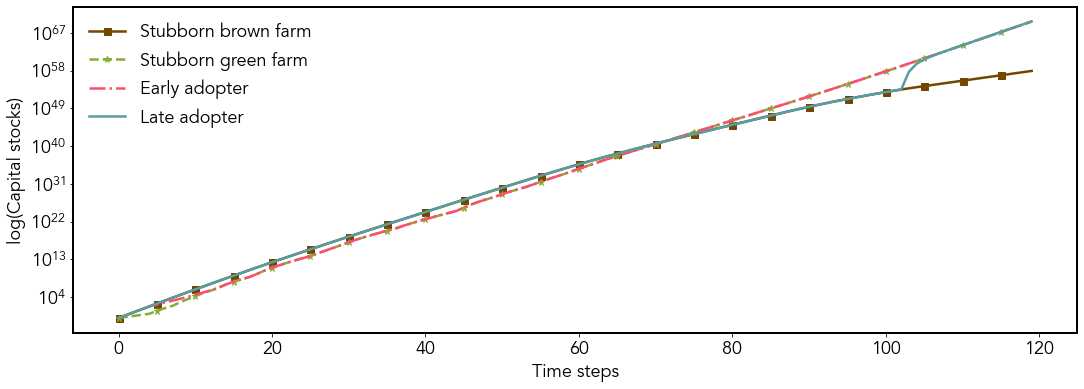

In [17]:
#Capital stock of the farms
eco_var = 'K'
init, fin = 0,120

Farms = [original_brown, original_green, earlyAdopter, lateAdopter]
#We set the color palette
colors = ['#744700', '#86AD34FF', '#FF4D6FFF', '#579EA4FF', 'purple' ]
labels = ['Stubborn brown farm', 'Stubborn green farm', 'Early adopter', 'Late adopter']
linestyle = ['-', '--', "-.", '-']
markers = ['s','*', '', '','']

#Plot settings
plt.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

#-- We initialize the figure
fig = plt.figure(figsize = (18,12/2))

for i, farm in enumerate(Farms):
    farm[eco_var][init:fin].plot(c=colors[i], lw=2.5, label=labels[i], ls=linestyle[i],
                                marker = markers[i], markevery=5, markersize=7)

plt.legend(frameon=False)
plt.ylabel('log(Capital stocks)')
plt.xlabel('Time steps')
plt.yscale('log')
plt.show()

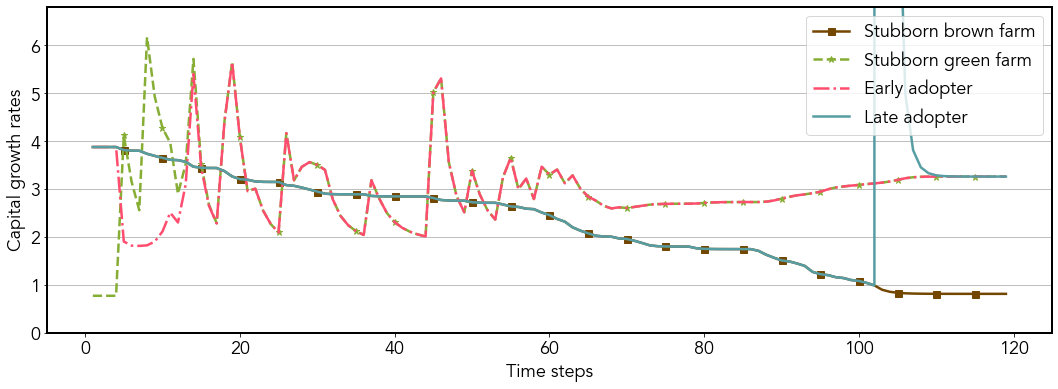

In [18]:
#Capital growth rate of the farms
eco_var = 'K'
init, fin = 0,120

Farms = [original_brown, original_green, earlyAdopter, lateAdopter]
#We set the color palette
colors = ['#744700', '#86AD34FF', '#FF4D6FFF', '#579EA4FF', 'purple' ]
labels = ['Stubborn brown farm', 'Stubborn green farm', 'Early adopter', 'Late adopter']
linestyle = ['-', '--', "-.", '-']
markers = ['s','*', '', '','']

#Plot settings
plt.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

#-- We initialize the figure
fig = plt.figure(figsize = (18,12/2))

for i, farm in enumerate(Farms):
    farm[eco_var][init:fin].pct_change().plot(c=colors[i], lw=2.5, label=labels[i], ls=linestyle[i],
                                marker = markers[i], markevery=5, markersize=7)

plt.ylim(0,6.8)
plt.grid(axis='y')
plt.legend()
plt.ylabel('Capital growth rates')
plt.xlabel('Time steps')
plt.show()

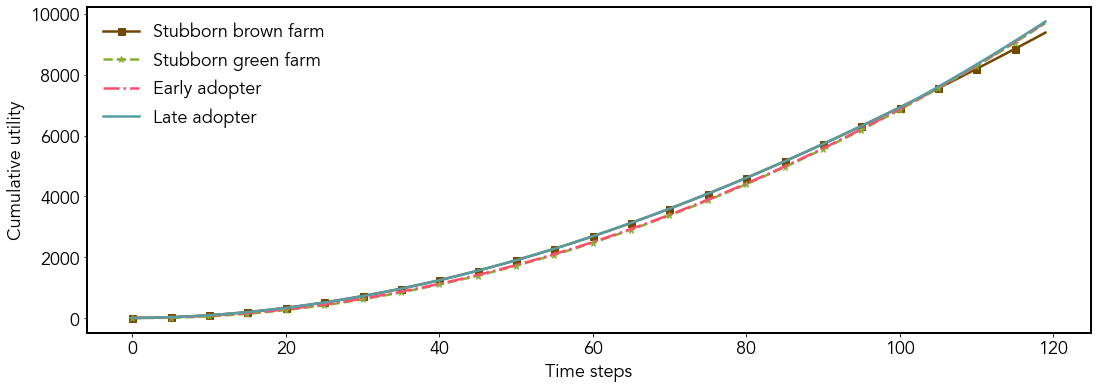

In [19]:
#Cumulative utility
eco_var = 'U'
init, fin = 0,120

Farms = [original_brown, original_green, earlyAdopter, lateAdopter]
#We set the color palette
colors = ['#744700', '#86AD34FF', '#FF4D6FFF', '#579EA4FF', 'purple' ]
labels = ['Stubborn brown farm', 'Stubborn green farm', 'Early adopter', 'Late adopter']
linestyle = ['-', '--', "-.", '-']
markers = ['s','*', '', '','']

#Plot settings
plt.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

#-- We initialize the figure
fig = plt.figure(figsize = (18,12/2))

for i, farm in enumerate(Farms):
    farm[eco_var][init:fin].plot(c=colors[i], lw=2.5, label=labels[i], ls=linestyle[i],
                                marker = markers[i], markevery=5, markersize=7)

plt.legend(frameon=False)
plt.ylabel('Cumulative utility')
plt.xlabel('Time steps')
plt.show()